In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset

transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root='../Data', train=True, download=True, transform=transform)

In [4]:
test_data = datasets.MNIST(root='../Data', train=False, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [7]:
# Start batch size small, then work to larger batches

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [8]:
# We will define 2 convolutional layers in our model

# 1 input channel (greyscale images=1 color channel)
# 6 output channels for feature extraction i.e. feature maps 
# 3 is the kernel size i.e. filter size
# 1 step size i.e. stride

# 1 color channel (greyscale input channel), 6 filters (output channels), 3x3 kernel, stride=1
conv1 = nn.Conv2d(1,6,3,1) # ---> 6 filters ---> pooling ---> conv2

# 6 input filters from conv1, 16 filters, 3x3 kernel, stride=1
conv2 = nn.Conv2d(6,16,3,1)

In [9]:
# grab first MNIST record for review

for i, (X_train,y_train) in enumerate(train_data):
    break

In [10]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
X_train.shape

torch.Size([1, 28, 28])

In [12]:
X_train.view(1,1,28,28) # ---> convert to 4D batch (batch of 1 image)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [13]:
x = X_train.view(1,1,28,28)

In [14]:
x = F.relu(conv1(x))

In [15]:
x.shape

# 1 image, 6 filters, 26x26 image size because borders are lost (padding=0)
# MNIST dataset doesn't have much border information, so we are not concerned with losing the border

torch.Size([1, 6, 26, 26])

In [17]:
# Pass through pooling layer
# Pass convolution layer, kernel=2x2, stride=2

x = F.max_pool2d(x, 2, 2)

In [18]:
x.shape

torch.Size([1, 6, 13, 13])

In [19]:
# pooling function of 2x2 & 2 stride halves the size to 13x13

In [20]:
x = F.relu(conv2(x))

In [21]:
x.shape

torch.Size([1, 16, 11, 11])

In [22]:
x = F.max_pool2d(x, 2, 2)

In [23]:
x.shape

torch.Size([1, 16, 5, 5])

In [24]:
# Rounds down 11/2 = 5.5

In [26]:
# Flatten layer
# -1 says to keep the shape of the first dimension, allows variable batch size

x.view(-1,16*5*5).shape

torch.Size([1, 400])

In [27]:
# Put it all together in a class
# Treat pooling layers more like activation function

class ConvolutionalNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,16*5*5) # flatten
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X,dim=1)

In [28]:
torch.manual_seed(42)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [29]:
# Check the number of parameters

for param in model.parameters():
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [30]:
# 60074 parameters, which is less than the traditional ANN

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [32]:
import time
start_time = time.time()

# Variables (trackers)

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop for epochs

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    

    # Train
    for b,(X_train,y_train) in enumerate(train_loader):
        
        b+=1
        
        y_pred = model(X_train) # not flattened because convolutional layer expects 2d data
        loss = criterion(y_pred,y_train)
        
        predicted = torch.max(y_pred.data,1)[1]
        batch_corr = (predicted == y_train).sum() # True 1 / False 0 sum() 
        trn_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%600 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/60000]  loss: {loss.item():10.4f}  \
            accuracy: {trn_corr.item()*100/(10*b):7.2f}%')
            
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    
    # Test
    with torch.no_grad():
        for b,(X_test,y_test) in enumerate(test_loader):
            
            y_val = model(X_test)
            
            predicted = torch.max(y_val.data,1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val,y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f'Training took {total/60} minutes')

epoch: 0   batch: 600   loss: 0.2116   accuracy: 7.82
epoch: 0   batch: 1200   loss: 0.5513   accuracy: 8.54
epoch: 0   batch: 1800   loss: 0.0360   accuracy: 8.85
epoch: 0   batch: 2400   loss: 0.0340   accuracy: 9.03
epoch: 0   batch: 3000   loss: 0.0132   accuracy: 9.14
epoch: 0   batch: 3600   loss: 0.0050   accuracy: 9.22
epoch: 0   batch: 4200   loss: 0.0738   accuracy: 9.28
epoch: 0   batch: 4800   loss: 0.0008   accuracy: 9.34
epoch: 0   batch: 5400   loss: 0.0004   accuracy: 9.38
epoch: 0   batch: 6000   loss: 0.0039   accuracy: 9.41
epoch: 1   batch: 600   loss: 0.0940   accuracy: 9.78
epoch: 1   batch: 1200   loss: 0.2304   accuracy: 9.77
epoch: 1   batch: 1800   loss: 0.3860   accuracy: 9.77
epoch: 1   batch: 2400   loss: 0.0077   accuracy: 9.78
epoch: 1   batch: 3000   loss: 0.0008   accuracy: 9.78
epoch: 1   batch: 3600   loss: 0.2568   accuracy: 9.78
epoch: 1   batch: 4200   loss: 0.0063   accuracy: 9.79
epoch: 1   batch: 4800   loss: 0.1001   accuracy: 9.79
epoch: 1   b

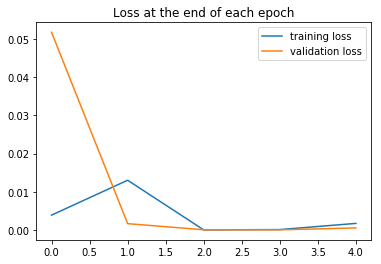

In [33]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

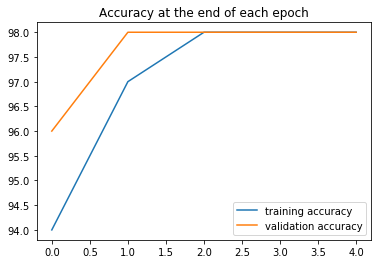

In [34]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [35]:
test_load_all = DataLoader(test_data,batch_size=10000,shuffle=False)

In [36]:
with torch.no_grad():
    correct = 0
    for X_test,y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [39]:
correct.item()/len(test_data)

0.9857

In [40]:
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 978    0    1    2    0    2    5    1    7    3]
 [   0 1130    7    2    0    0    3    3    1    0]
 [   0    0 1012    2    1    0    0    3    3    0]
 [   0    1    1  997    0   18    0    0    2    0]
 [   0    0    1    0  978    0    1    0    4    8]
 [   0    2    0    1    0  858    2    0    1    2]
 [   1    0    0    0    1    2  946    0    0    0]
 [   1    1    6    2    0    1    0 1019    2    4]
 [   0    1    4    4    0    4    1    0  949    2]
 [   0    0    0    0    2    7    0    2    5  990]]


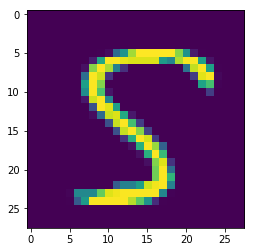

In [51]:
# run single image through the model and see what it predicts

plt.imshow(test_data[333][0].reshape(28,28))

In [54]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[333][0].view(1,1,28,28))

In [55]:
new_prediction.argmax()

tensor(5)